In [286]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

In [287]:
# calculate two tailed p-value
print((1 - stats.t.cdf(x=2.14, df=20)) * 2)

0.04486555082549959


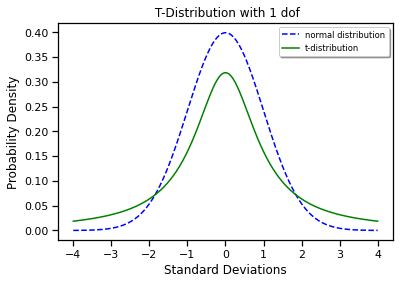

In [288]:
# figure 7.1
df = 1
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)
z = stats.norm.pdf(x)

plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')
plt.title(f' T-Distribution with 1 dof')

plt.plot(x,z,'--',color='blue',label='normal distribution')
plt.plot(x, y, color='green',label='t-distribution')
legend = plt.legend(shadow=True,fontsize='small')

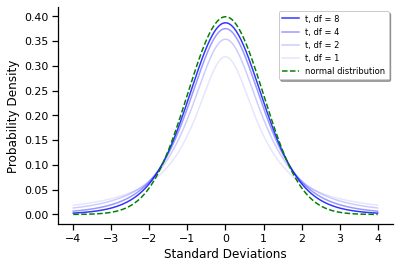

In [289]:
# figure 7.2
plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')
for i in [8,4,2,1]:
    df = i
    x = np.linspace(-4, 4, 500)
    y = stats.t.pdf(x, df)
    z = stats.norm.pdf(x)
    plt.plot(x, y,color= 'b',alpha=i/10,label=f't, df = {df}'.format(df=i))

plt.plot(x,z,'--',color='green',label='normal distribution')


legend = plt.legend(shadow=True,fontsize='small')
sns.set_context('notebook')
sns.despine()

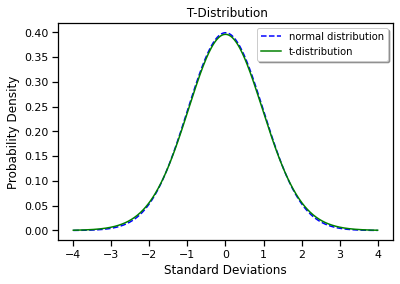

In [290]:
# as seen, the t-distribution converges to normal distribution as dof increases.
df = 31
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)
z = stats.norm.pdf(x)

plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')
plt.title(f' T-Distribution')

plt.plot(x,z,'--',color='blue',label='normal distribution')
plt.plot(x, y, color='green',label='t-distribution')
legend = plt.legend(shadow=True,fontsize='small')

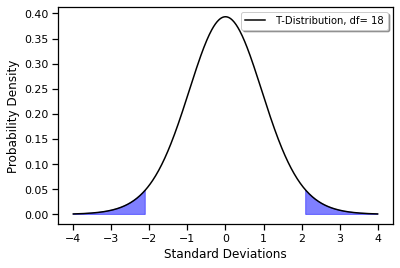

In [291]:
df = 18
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)
t = -2.10

plt.ylabel('Probability Density')
plt.xlabel('Standard Deviations')

plt.plot(x, y, color='black',label=f' T-Distribution, df= {df}'.format(df=df))
legend = plt.legend(shadow=True,fontsize='small')
plt.fill_between(x, y, color='blue', alpha=0.5, where=(x<t) | (x>abs(t)))

Text(0.5, 1.0, 'Figure 7.4 - Right | Example 7.4')

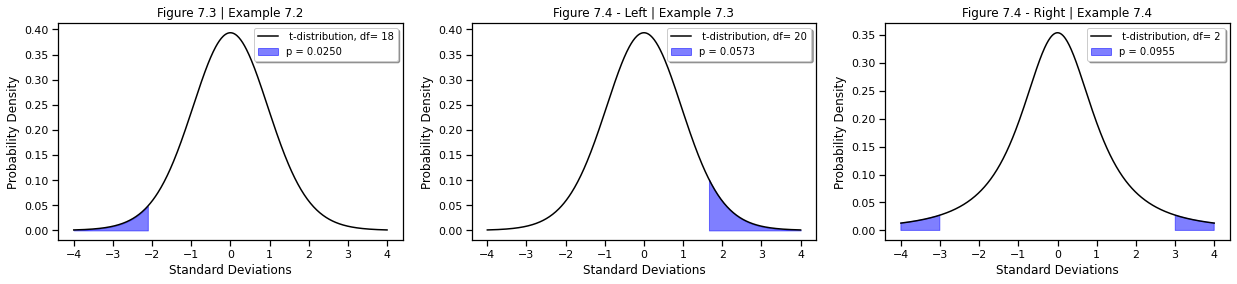

In [292]:
# figure 7.3 and 7.4 , example 7.2, 7.3, 7.4
fig = plt.figure(figsize=(21,4))
x = np.linspace(-4, 4, 500)

# AX1 -----
ax1 = fig.add_subplot(1,3,1)
df1 = 18
t1 = -2.10
y1 = stats.t.pdf(x, df1)
p1 = stats.t.cdf(x=t1, df=df1)

ax1.plot(x, y, color='black',label=f' t-distribution, df= {df1}'.format(df=df1))
ax1.fill_between(x, y1, color='blue', alpha=0.5, where=(x<t1),label="p = {:.4f}".format(p1))
legend = ax1.legend(shadow=True,fontsize='small')
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Standard Deviations')
ax1.set_title('Figure 7.3 | Example 7.2')


# AX2 -----
ax2 = fig.add_subplot(1,3,2)
df2 = 20
t2 = 1.65
y2 = stats.t.pdf(x, df2)
p2 = 1- stats.t.cdf(x=t2, df=df2)

ax2.plot(x, y, color='black',label=f' t-distribution, df= {df2}'.format(df=df2))
ax2.fill_between(x, y2, color='blue', alpha=0.5, where=(x>t2),label="p = {:.4f}".format(p2))
legend = ax2.legend(shadow=True,fontsize='small')
ax2.set_ylabel('Probability Density')
ax2.set_xlabel('Standard Deviations')
ax2.set_title('Figure 7.4 - Left | Example 7.3')

# AX3 -----
ax3 = fig.add_subplot(1,3,3)
df3 = 2
t3 = -3
y3 = stats.t.pdf(x, df3)
p3 = stats.t.cdf(x=t3, df=df3) * 2

ax3.plot(x, y3, color='black',label=f' t-distribution, df= {df3}'.format(df=df3))
ax3.fill_between(x, y3, color='blue', alpha=0.5, where=(x<t3) | (x>abs(t3)),label="p = {:.4f}".format(p3))
legend = ax3.legend(shadow=True,fontsize='small')
ax3.set_ylabel('Probability Density')
ax3.set_xlabel('Standard Deviations')
ax3.set_title('Figure 7.4 - Right | Example 7.4')

Text(0.5, 1.0, 'Guided Practice 7.5')

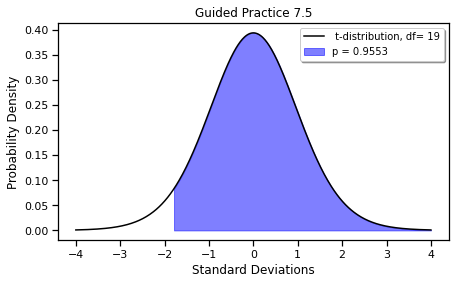

In [293]:
# guided practice 7.5: What proportion of the t-distribution with 19 degrees of freedom falls above -1.79 units? Use your preferred method for finding tail areas.
fig = plt.figure(figsize=(7,4))
x = np.linspace(-4, 4, 500)

# AX1 -----
ax1 = fig.add_subplot(1,1,1)
df1 = 19
t1 = -1.79
y1 = stats.t.pdf(x, df1)
p1 = 1 - stats.t.cdf(x=t1, df=df1)

ax1.plot(x, y, color='black',label=f' t-distribution, df= {df1}'.format(df=df1))
ax1.fill_between(x, y1, color='blue', alpha=0.5, where=(x>t1),label="p = {:.4f}".format(p1))
legend = ax1.legend(shadow=True,fontsize='small')
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Standard Deviations')
ax1.set_title('Guided Practice 7.5')

In [294]:
'''example 7.8: When n = 19, what is the appropriate degrees of freedom? Find t statistic for this degrees of freedom and the confidence level of 95%
'''
n = 19
xbar = 4.4
s = 2.3
mini = 1.7
maxi = 9.2
df = n - 1
ci = 95
c1t = (100 - ci) / 2 / 100
t_stat = stats.t.ppf(1-c1t, df) # upper tail is 1 - confidence level /2 (one tail)
print('''n = {n} , xbar = {xbar} , s = {s} , min = {mini}, max = {maxi}
the appropriate degrees of freedom is'''.format(n=n,s=s,xbar=xbar,mini=mini,maxi=maxi),df,'''
upper tail cutoff: t =''',t_stat)

'''example 7.9: Compute and interpret the 95% confidence interval for the average mercury content in Risso's dolphins.'''
se = s / np.sqrt(n)
me = t_stat * se
lo = xbar - me
hi = xbar + me
print('''standard error = {se}, me = {me}, , df = {df}
we're {ci}% confident that the true average mercury content in Risso's dolphins is between {lo} and {hi}'''.format(ci=ci,se=se,me=me,lo=lo,hi=hi,df=df))

n = 19 , xbar = 4.4 , s = 2.3 , min = 1.7, max = 9.2
the appropriate degrees of freedom is 18 
upper tail cutoff: t = 2.10092204024096
standard error = 0.527656187902292, me = 1.1085645148334506, , df = 18
we're 95% confident that the true average mercury content in Risso's dolphins is between 3.2914354851665495 and 5.508564514833451


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4505 entries, 15 to 4641
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SAMPLE DESCRIPTION  4505 non-null   object 
 1   ANALYTE MEASURED*   4505 non-null   object 
 2   CONC. (ppm)         4505 non-null   float64
 3   YEAR                4505 non-null   object 
dtypes: float64(1), object(3)
memory usage: 176.0+ KB
None
Index(['TUNA CANNED (ALBACORE)', 'TUNA CANNED (LIGHT)',
       'TUNA FR/FZN YELLOWFIN', 'TUNA CANNED (LIGHT CHUNK)', 'SWORDFISH',
       'TUNA CANNED (ALBACORE SOLID WHITE )', 'BLUEFISH', 'SARDINE',
       'CROAKER ATLANTIC', 'COD', 'ORANGE ROUGHY', 'SEA BASS CHILEAN',
       'HALIBUT', 'SALMON', 'TUNA CANNED (LIGHT YELLOWFIN)', 'LOBSTER',
       'TUNA FR/FZN', 'TUNA CANNED (ALBACORE CHUNK WHITE)',
       'FLATFISH: FLOUNDER', 'HADDOCK', 'POLLOCK', 'CRAWFISH', 'SNAPPER RED',
       'CATFISH', 'SEA BASS STRIPED', 'HAKE', 'SCALLOP',
   

c:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
c:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


Text(-1.7613101357748562, 0.05000000000000313, '0.26')

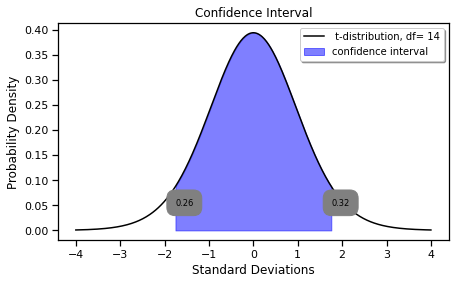

In [295]:
'''guided practice 7.10
The FDA's webpage provides some data on mercury content of fish. Based on a sample of 15 croaker
white fish (Pacific), a sample mean and standard deviation were computed as 0.287 and 0.069 ppm
(parts per million), respectively. The 15 observations ranged from 0.18 to 0.41 ppm. We will assume
these observations are independent. Based on the summary statistics of the data, do you have any
objections to the normality condition of the individual observations?
example 7.11
Estimate the standard error of xhat = 0.287 ppm using the data summaries in Guided Practice 7.10.
If we are to use the t-distribution to create a 90% confidence interval for the actual mean of the
mercury content, identify the degrees of freedom and t-statistic?
guided practice 7.12
Using the information and results of Guided Practice 7.10 and Example 7.11, compute a 90% con-
fidence interval for the average mercury content of croaker white fish (Pacific).
'''
# i want to play with the real data so, i'll try to navigate through the data to find the same aggregate
# values with the author in the book.

merc = pd.read_csv("data/mercury.csv")
merc.dropna(inplace=True)
merc["CONC. (ppm)"] = pd.to_numeric(merc["CONC. (ppm)"].str.replace(',','.'))
print(merc.info())

# we need to find out what's the full name of the croaker white pacific fishes
print(merc[merc["ANALYTE MEASURED*"] == "Mercury"]["SAMPLE DESCRIPTION"].value_counts().index)
croaker = merc[merc["SAMPLE DESCRIPTION"] == "CROAKER WHITE"]
x = croaker["CONC. (ppm)"]

n = croaker["SAMPLE DESCRIPTION"].count()
xbar = x.mean()
s = x.std()
mini = x.min()
maxi = x.max()
mini_away = abs(xbar - mini) / s
maxi_away = abs(xbar - maxi) / s
print("7.10: since at most, the observations are",max(mini_away,maxi_away), '''standard deviations away 
from the mean and it's within 2 standard deviations, there are no clear outliers''')

df = n - 1
ci = 90
c1t = (100 - ci) / 2 / 100
t_stat = stats.t.ppf(1-c1t, df) # upper tail is 1 - confidence level /2 (one tail)
se = s / np.sqrt(n)
me = t_stat * se
lo = xbar - me
hi = xbar + me
print('''7.11: standard error = {se:.4f}, me = {me:.4f}, df = {df}, t_stat = {t_stat:.4f}
7.12: we're {ci}% confident that the true average mercury content in croaker white fishes is between {lo:.4f} and {hi:.4f}'''
.format(ci=ci,se=se,me=me,lo=lo,hi=hi,df=df,t_stat=t_stat))

fig = plt.figure(figsize=(7,4))
x = np.linspace(-4, 4, 500)

ax = fig.add_subplot(1,1,1)
y = stats.t.pdf(x, df1)
t_hi = t_stat
t_lo = (t_stat)* -1

ax.plot(x, y, color='black',label=f' t-distribution, df= {df}'.format(df=df))
ax.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<t_lo) | (x>t_hi)) ,label="confidence interval")
legend = ax.legend(shadow=True,fontsize='small')
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('Confidence Interval')
ax.text(t_hi, stats.t.cdf(x=t_lo, df=df), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax.text(t_lo, stats.t.cdf(x=t_lo, df=df), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')

In [296]:
#CHERRY BLOSSOM RACE EXAMPLE PREP:
run17 = pd.read_csv("data/run17samp.csv")
run17["time_min"] = run17["net_sec"] / 60
time_min = run17["time_min"]
print(run17.info())
print(run17.describe()["time_min"])
run17.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bib        100 non-null    int64  
 1   name       100 non-null    object 
 2   sex        100 non-null    object 
 3   age        100 non-null    int64  
 4   city       100 non-null    object 
 5   net_sec    100 non-null    int64  
 6   clock_sec  100 non-null    int64  
 7   pace_sec   100 non-null    int64  
 8   event      100 non-null    object 
 9   time_min   100 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 7.9+ KB
None
count    100.000000
mean      88.775333
std       25.191216
min       23.616667
25%       80.645833
50%       91.725000
75%      103.045833
max      132.583333
Name: time_min, dtype: float64


,bib,name,sex,age,city,net_sec,clock_sec,pace_sec,event,time_min
0,2390,Laura J.,F,48,"Arlington, VA",4680,4950,468,10 Mile,78.000000
1,7479,Caitlin S.,F,28,"Washington, DC",4937,5272,493,10 Mile,82.283333
2,16371,Cristina O.,F,35,"Toronto, ON",6289,7415,628,10 Mile,104.816667
3,3096,Michael P.,M,25,"Washington, DC",4400,4608,440,10 Mile,73.333333
4,15082,Laila C.,F,33,"Fairfax, VA",7619,8858,761,10 Mile,126.983333


7.14
H0: the runners haven't done better in Cherry Blossom race in 11 years. there's no 
difference in average finish times between 2006 and 2017. (u = 93.29 minutes)
HA: the runners have done better in Cherry Blossom race in 11 years. there's difference in 
average finish times between 2006 and 2017. (u != 93.29 minutes)
7.15
if there's no outliers, we shouldn't worry about the normality with 100 observations in the sample.
we can see in the below histogram, there's no extreme extreme outliers in our data, so we can proceed with 
normality condition satisfied.


Text(0.5, 1.0, 'Figure 7.7')

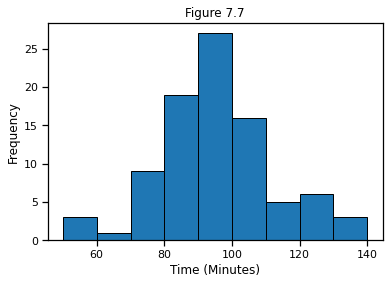

In [297]:
'''guided practice 7.14: What are appropriate hypotheses for this context?
guided practice 7.15: The data come from a simple random sample of all participants, so the observations are independent.
However, should we be worried about the normality condition? See Figure 7.7 for a histogram of
the differences and evaluate if we can move forward.'''
print('''7.14
H0: the runners haven't done better in Cherry Blossom race in 11 years. there's no 
difference in average finish times between 2006 and 2017. (u = 93.29 minutes)
HA: the runners have done better in Cherry Blossom race in 11 years. there's difference in 
average finish times between 2006 and 2017. (u != 93.29 minutes)
7.15
if there's no outliers, we shouldn't worry about the normality with 100 observations in the sample.
we can see in the below histogram, there's no extreme extreme outliers in our data, so we can proceed with 
normality condition satisfied.''')
# figure 7.7, probably the sample data in the openintro website has changed. the histogram is not
# the same as the book.
plt.hist(time_min, edgecolor='black',bins=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140])
plt.ylabel('Frequency')
plt.xlabel('Time (Minutes)')
plt.title('Figure 7.7')

Since p = 0.0762 and it's bigger than our .05 significance level, we can't reject the null hypothesis and conclude 
the data doesn't provide strong evidence to reject the notion that the runners in US done different in terms of finish times
in 10 years.


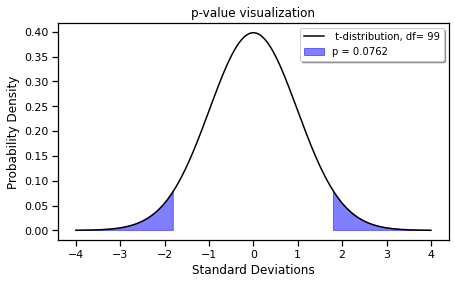

In [298]:
# example 7.16
# two tailed hypothesis test
n = time_min.count()
sample = time_min
x0 = 93.29
xbar = time_min.mean()
s = sample.std() # standard deviation of our sample
se = s / np.sqrt(n) # standard error is standard deviation of the sample divided by square root of sample size 
df = n - 1 # degree of freedom
t = (xbar - x0) / se # compute t-score
p1t = stats.t.cdf(x=t, df=df)
p = stats.t.cdf(x=t, df=df) * 2 # two tailed p-value of corresponding t-score

# viz
fig = plt.figure(figsize=(7,4))
x = np.linspace(-4, 4, 500)
ax = fig.add_subplot(1,1,1)
y = stats.t.pdf(x, df)
two_t = [t,t*(-1)]
ax.plot(x, y, color='black',label=f' t-distribution, df= {df}'.format(df=df))
ax.fill_between(x, y, color='blue', alpha=0.5, where=(x<min(two_t)) | (x>max(two_t)),label="p = {:.4f}".format(p))
legend = ax.legend(shadow=True,fontsize='small')
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('p-value visualization')

print('''Since p = {p:.4f} and it's bigger than our .05 significance level, we can't reject the null hypothesis and conclude 
the data doesn't provide strong evidence to reject the notion that the runners in US done different in terms of finish times
in 10 years.'''
.format(p=p))

In [299]:
'''7.1 Identify the critical t. An independent random sample is selected from an approximately normal
population with unknown standard deviation. Find the degrees of freedom and the critical t-value (t?) for
the given sample size and confidence level.
(a) n = 6, CL = 90%
(b) n = 21, CL = 98%
(c) n = 29, CL = 95%
(d) n = 12, CL = 99%'''

'7.1 Identify the critical t. An independent random sample is selected from an approximately normal\npopulation with unknown standard deviation. Find the degrees of freedom and the critical t-value (t?) for\nthe given sample size and confidence level.\n(a) n = 6, CL = 90%\n(b) n = 21, CL = 98%\n(c) n = 29, CL = 95%\n(d) n = 12, CL = 99%'

In [300]:
'''7.2 t-distribution. The figure on the right shows three unimodal and symmetric curves: the standard
normal (z) distribution, the t-distribution with 5 degrees of freedom, and the t-distribution with 1 degree of
freedom. Determine which is which, and explain your reasoning.'''

'7.2 t-distribution. The figure on the right shows three unimodal and symmetric curves: the standard\nnormal (z) distribution, the t-distribution with 5 degrees of freedom, and the t-distribution with 1 degree of\nfreedom. Determine which is which, and explain your reasoning.'

In [301]:
'''7.3 Find the p-value, Part I. An independent random sample is selected from an approximately normal
population with an unknown standard deviation. Find the p-value for the given sample size and test statistic.
Also determine if the null hypothesis would be rejected at alpha = 0.05.
(a) n = 11, T = 1.91
(b) n = 17, T = -3.45
(c) n = 7, T = 0.83
(d) n = 28, T = 2.13'''

'7.3 Find the p-value, Part I. An independent random sample is selected from an approximately normal\npopulation with an unknown standard deviation. Find the p-value for the given sample size and test statistic.\nAlso determine if the null hypothesis would be rejected at alpha = 0.05.\n(a) n = 11, T = 1.91\n(b) n = 17, T = -3.45\n(c) n = 7, T = 0.83\n(d) n = 28, T = 2.13'

In [302]:
'''7.4 Find the p-value, Part II. An independent random sample is selected from an approximately normal
population with an unknown standard deviation. Find the p-value for the given sample size and test statistic.
Also determine if the null hypothesis would be rejected at alpha = 0.01.
(a) n = 26, T = 2.485
(b) n = 18, T = 0.5'''

'7.4 Find the p-value, Part II. An independent random sample is selected from an approximately normal\npopulation with an unknown standard deviation. Find the p-value for the given sample size and test statistic.\nAlso determine if the null hypothesis would be rejected at alpha = 0.01.\n(a) n = 26, T = 2.485\n(b) n = 18, T = 0.5'

In [303]:
'''7.5 Working backwards, Part I. A 95% confidence interval for a population mean, u, is given as (18.985,
21.015). This confidence interval is based on a simple random sample of 36 observations. Calculate the
sample mean and standard deviation. Assume that all conditions necessary for inference are satisfied. Use
the t-distribution in any calculations.'''

'7.5 Working backwards, Part I. A 95% confidence interval for a population mean, u, is given as (18.985,\n21.015). This confidence interval is based on a simple random sample of 36 observations. Calculate the\nsample mean and standard deviation. Assume that all conditions necessary for inference are satisfied. Use\nthe t-distribution in any calculations.'

In [304]:
'''7.6 Working backwards, Part II. A 90% confidence interval for a population mean is (65, 77). The
population distribution is approximately normal and the population standard deviation is unknown. This
confidence interval is based on a simple random sample of 25 observations. Calculate the sample mean, the
margin of error, and the sample standard deviation.'''

'7.6 Working backwards, Part II. A 90% confidence interval for a population mean is (65, 77). The\npopulation distribution is approximately normal and the population standard deviation is unknown. This\nconfidence interval is based on a simple random sample of 25 observations. Calculate the sample mean, the\nmargin of error, and the sample standard deviation.'

In [305]:
'''7.7 Sleep habits of New Yorkers. New York is known as \the city that never sleeps". A random sample
of 25 New Yorkers were asked how much sleep they get per night. Statistical summaries of these data are
shown below. The point estimate suggests New Yorkers sleep less than 8 hours a night on average. Is the
result statistically significant?
n xbar s min max
25 7.73 0.77 6.17 9.78
(a) Write the hypotheses in symbols and in words.
(b) Check conditions, then calculate the test statistic, T, and the associated degrees of freedom.
(c) Find and interpret the p-value in this context. Drawing a picture may be helpful.
(d) What is the conclusion of the hypothesis test?
(e) If you were to construct a 90% confidence interval that corresponded to this hypothesis test, would you
expect 8 hours to be in the interval?'''

'7.7 Sleep habits of New Yorkers. New York is known as \the city that never sleeps". A random sample\nof 25 New Yorkers were asked how much sleep they get per night. Statistical summaries of these data are\nshown below. The point estimate suggests New Yorkers sleep less than 8 hours a night on average. Is the\nresult statistically significant?\nn xbar s min max\n25 7.73 0.77 6.17 9.78\n(a) Write the hypotheses in symbols and in words.\n(b) Check conditions, then calculate the test statistic, T, and the associated degrees of freedom.\n(c) Find and interpret the p-value in this context. Drawing a picture may be helpful.\n(d) What is the conclusion of the hypothesis test?\n(e) If you were to construct a 90% confidence interval that corresponded to this hypothesis test, would you\nexpect 8 hours to be in the interval?'

In [306]:
'''7.8 Heights of adults. Researchers studying anthropometry collected body girth measurements and skele-
tal diameter measurements, as well as age, weight, height and gender, for 507 physically active individuals.
The histogram below shows the sample distribution of heights in centimeters.
(a) What is the point estimate for the average height of active individuals? What about the median?
(b) What is the point estimate for the standard deviation of the heights of active individuals? What about
the IQR?
(c) Is a person who is 1m 80cm (180 cm) tall considered unusually tall? And is a person who is 1m 55cm
(155cm) considered unusually short? Explain your reasoning.
(d) The researchers take another random sample of physically active individuals. Would you expect the mean
and the standard deviation of this new sample to be the ones given above? Explain your reasoning.
(e) The sample means obtained are point estimates for the mean height of all active individuals, if the
sample of individuals is equivalent to a simple random sample. What measure do we use to quantify the
variability of such an estimate? Compute this quantity using the data from the original sample under
the condition that the data are a simple random sample.'''

'7.8 Heights of adults. Researchers studying anthropometry collected body girth measurements and skele-\ntal diameter measurements, as well as age, weight, height and gender, for 507 physically active individuals.\nThe histogram below shows the sample distribution of heights in centimeters.\n(a) What is the point estimate for the average height of active individuals? What about the median?\n(b) What is the point estimate for the standard deviation of the heights of active individuals? What about\nthe IQR?\n(c) Is a person who is 1m 80cm (180 cm) tall considered unusually tall? And is a person who is 1m 55cm\n(155cm) considered unusually short? Explain your reasoning.\n(d) The researchers take another random sample of physically active individuals. Would you expect the mean\nand the standard deviation of this new sample to be the ones given above? Explain your reasoning.\n(e) The sample means obtained are point estimates for the mean height of all active individuals, if the\nsample of i

In [307]:
'''7.9 Find the mean. You are given the following hypotheses:
H0 : u = 60
HA : u 6= 60
We know that the sample standard deviation is 8 and the sample size is 20. For what sample mean would
the p-value be equal to 0.05? Assume that all conditions necessary for inference are satisfied.'''

'7.9 Find the mean. You are given the following hypotheses:\nH0 : u = 60\nHA : u 6= 60\nWe know that the sample standard deviation is 8 and the sample size is 20. For what sample mean would\nthe p-value be equal to 0.05? Assume that all conditions necessary for inference are satisfied.'

In [308]:
'''7.10 t? vs. z?. For a given confidence level, t?
df is larger than z?. Explain how t* being slightly larger
than z* affects the width of the confidence interval.'''

'7.10 t? vs. z?. For a given confidence level, t?\ndf is larger than z?. Explain how t* being slightly larger\nthan z* affects the width of the confidence interval.'

In [309]:
'''7.11 Play the piano. Georgianna claims that in a small city renowned for its music school, the average
child takes less than 5 years of piano lessons. We have a random sample of 20 children from the city, with a
mean of 4.6 years of piano lessons and a standard deviation of 2.2 years.
(a) Evaluate Georgianna's claim (or that the opposite might be true) using a hypothesis test.
(b) Construct a 95% confidence interval for the number of years students in this city take piano lessons, and
interpret it in context of the data.
(c) Do your results from the hypothesis test and the confidence interval agree? Explain your reasoning.'''

"7.11 Play the piano. Georgianna claims that in a small city renowned for its music school, the average\nchild takes less than 5 years of piano lessons. We have a random sample of 20 children from the city, with a\nmean of 4.6 years of piano lessons and a standard deviation of 2.2 years.\n(a) Evaluate Georgianna's claim (or that the opposite might be true) using a hypothesis test.\n(b) Construct a 95% confidence interval for the number of years students in this city take piano lessons, and\ninterpret it in context of the data.\n(c) Do your results from the hypothesis test and the confidence interval agree? Explain your reasoning."

In [310]:
'''7.12 Auto exhaust and lead exposure. Researchers interested in lead exposure due to car exhaust sampled
the blood of 52 police officers subjected to constant inhalation of automobile exhaust fumes while working
traffic enforcement in a primarily urban environment. The blood samples of these officers had an average
lead concentration of 124.32 ug/l and a SD of 37.74 ug/l; a previous study of individuals from a nearby
suburb, with no history of exposure, found an average blood level concentration of 35 ug/l.9
(a) Write down the hypotheses that would be appropriate for testing if the police officers appear to have
been exposed to a different concentration of lead.
(b) Explicitly state and check all conditions necessary for inference on these data.
(c) Regardless of your answers in part (b), test the hypothesis that the downtown police officers have a
higher lead exposure than the group in the previous study. Interpret your results in context.'''

'7.12 Auto exhaust and lead exposure. Researchers interested in lead exposure due to car exhaust sampled\nthe blood of 52 police officers subjected to constant inhalation of automobile exhaust fumes while working\ntraffic enforcement in a primarily urban environment. The blood samples of these officers had an average\nlead concentration of 124.32 ug/l and a SD of 37.74 ug/l; a previous study of individuals from a nearby\nsuburb, with no history of exposure, found an average blood level concentration of 35 ug/l.9\n(a) Write down the hypotheses that would be appropriate for testing if the police officers appear to have\nbeen exposed to a different concentration of lead.\n(b) Explicitly state and check all conditions necessary for inference on these data.\n(c) Regardless of your answers in part (b), test the hypothesis that the downtown police officers have a\nhigher lead exposure than the group in the previous study. Interpret your results in context.'

In [311]:
'''7.13 Car insurance savings. A market researcher wants to evaluate car insurance savings at a competing
company. Based on past studies he is assuming that the standard deviation of savings is $100. He wants
to collect data such that he can get a margin of error of no more than $10 at a 95% confidence level. How
large of a sample should he collect?'''

'7.13 Car insurance savings. A market researcher wants to evaluate car insurance savings at a competing\ncompany. Based on past studies he is assuming that the standard deviation of savings is $100. He wants\nto collect data such that he can get a margin of error of no more than $10 at a 95% confidence level. How\nlarge of a sample should he collect?'

In [312]:
'''7.14 SAT scores. The standard deviation of SAT scores for students at a particular Ivy League college is
250 points. Two statistics students, Raina and Luke, want to estimate the average SAT score of students at
this college as part of a class project. They want their margin of error to be no more than 25 points.
(a) Raina wants to use a 90% confidence interval. How large a sample should she collect?
(b) Luke wants to use a 99% confidence interval. Without calculating the actual sample size, determine
whether his sample should be larger or smaller than Raina's, and explain your reasoning.
(c) Calculate the minimum required sample size for Luke.'''

"7.14 SAT scores. The standard deviation of SAT scores for students at a particular Ivy League college is\n250 points. Two statistics students, Raina and Luke, want to estimate the average SAT score of students at\nthis college as part of a class project. They want their margin of error to be no more than 25 points.\n(a) Raina wants to use a 90% confidence interval. How large a sample should she collect?\n(b) Luke wants to use a 99% confidence interval. Without calculating the actual sample size, determine\nwhether his sample should be larger or smaller than Raina's, and explain your reasoning.\n(c) Calculate the minimum required sample size for Luke."